In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split

In [31]:
df=pd.read_csv('car_evaluation.csv')
print(df)

      vhigh vhigh.1      2   2.1  small   low  unacc
0     vhigh   vhigh      2     2  small   med  unacc
1     vhigh   vhigh      2     2  small  high  unacc
2     vhigh   vhigh      2     2    med   low  unacc
3     vhigh   vhigh      2     2    med   med  unacc
4     vhigh   vhigh      2     2    med  high  unacc
...     ...     ...    ...   ...    ...   ...    ...
1722    low     low  5more  more    med   med   good
1723    low     low  5more  more    med  high  vgood
1724    low     low  5more  more    big   low  unacc
1725    low     low  5more  more    big   med   good
1726    low     low  5more  more    big  high  vgood

[1727 rows x 7 columns]


In [32]:
column_names=['buying','maintainence','doors','people','luggage booth','safety','decison']
df.columns=column_names

In [33]:
print(df.head())

  buying maintainence doors people luggage booth safety decison
0  vhigh        vhigh     2      2         small    med   unacc
1  vhigh        vhigh     2      2         small   high   unacc
2  vhigh        vhigh     2      2           med    low   unacc
3  vhigh        vhigh     2      2           med    med   unacc
4  vhigh        vhigh     2      2           med   high   unacc


In [34]:
print(df.isnull().sum())

buying           0
maintainence     0
doors            0
people           0
luggage booth    0
safety           0
decison          0
dtype: int64


In [35]:
x=df.drop(['decison'],axis=1)
print(x)

     buying maintainence  doors people luggage booth safety
0     vhigh        vhigh      2      2         small    med
1     vhigh        vhigh      2      2         small   high
2     vhigh        vhigh      2      2           med    low
3     vhigh        vhigh      2      2           med    med
4     vhigh        vhigh      2      2           med   high
...     ...          ...    ...    ...           ...    ...
1722    low          low  5more   more           med    med
1723    low          low  5more   more           med   high
1724    low          low  5more   more           big    low
1725    low          low  5more   more           big    med
1726    low          low  5more   more           big   high

[1727 rows x 6 columns]


In [36]:
y=df['decison']
print(y)

0       unacc
1       unacc
2       unacc
3       unacc
4       unacc
        ...  
1722     good
1723    vgood
1724    unacc
1725     good
1726    vgood
Name: decison, Length: 1727, dtype: object


In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [38]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1157, 6)
(1157,)
(570, 6)
(570,)


In [40]:
import category_encoders as ce

In [48]:
encoder=ce.OrdinalEncoder(cols=['buying','maintainence','doors','people','luggage booth','safety'])

In [49]:
print(encoder)

OrdinalEncoder(cols=['buying', 'maintainence', 'doors', 'people',
                     'luggage booth', 'safety'])


In [50]:
x_train=encoder.fit_transform(x_train)

In [51]:
print(x_train)

      buying  maintainence  doors  people  luggage booth  safety
83         1             1      1       1              1       1
48         1             1      2       2              1       2
468        2             1      2       3              2       2
155        1             2      2       2              1       1
1043       3             2      3       2              2       1
...      ...           ...    ...     ...            ...     ...
1130       3             3      2       2              3       1
1294       3             4      1       2              3       3
860        2             4      1       2              3       1
1459       4             2      3       1              2       3
1126       3             3      2       2              2       3

[1157 rows x 6 columns]


In [52]:
x_test=encoder.fit_transform(x_test)

In [53]:
print(x_test)

      buying  maintainence  doors  people  luggage booth  safety
599        1             1      1       1              1       1
932        2             2      1       2              1       1
628        1             1      2       1              1       2
1497       3             1      2       2              2       3
1262       2             3      1       3              2       1
...      ...           ...    ...     ...            ...     ...
1601       3             4      2       2              3       1
1033       2             1      1       1              1       2
341        4             3      3       3              3       1
147        4             1      4       2              2       3
360        4             3      4       2              3       3

[570 rows x 6 columns]


In [55]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
clf_en.fit(x_train, y_train)
y_pred_en = clf_en.predict(x_test)
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.7263


In [57]:
y_pred_train_en = clf_en.predict(x_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.7848


[Text(0.3333333333333333, 0.875, 'X[5] <= 1.5\nentropy = 1.206\nsamples = 1157\nvalue = [257, 51, 810, 39]'),
 Text(0.16666666666666666, 0.625, 'entropy = 0.0\nsamples = 391\nvalue = [0, 0, 391, 0]'),
 Text(0.5, 0.625, 'X[3] <= 1.5\nentropy = 1.484\nsamples = 766\nvalue = [257, 51, 419, 39]'),
 Text(0.3333333333333333, 0.375, 'entropy = 0.0\nsamples = 242\nvalue = [0, 0, 242, 0]'),
 Text(0.6666666666666666, 0.375, 'X[0] <= 2.5\nentropy = 1.639\nsamples = 524\nvalue = [257, 51, 177, 39]'),
 Text(0.5, 0.125, 'entropy = 0.997\nsamples = 266\nvalue = [124, 0, 142, 0]'),
 Text(0.8333333333333334, 0.125, 'entropy = 1.758\nsamples = 258\nvalue = [133, 51, 35, 39]')]

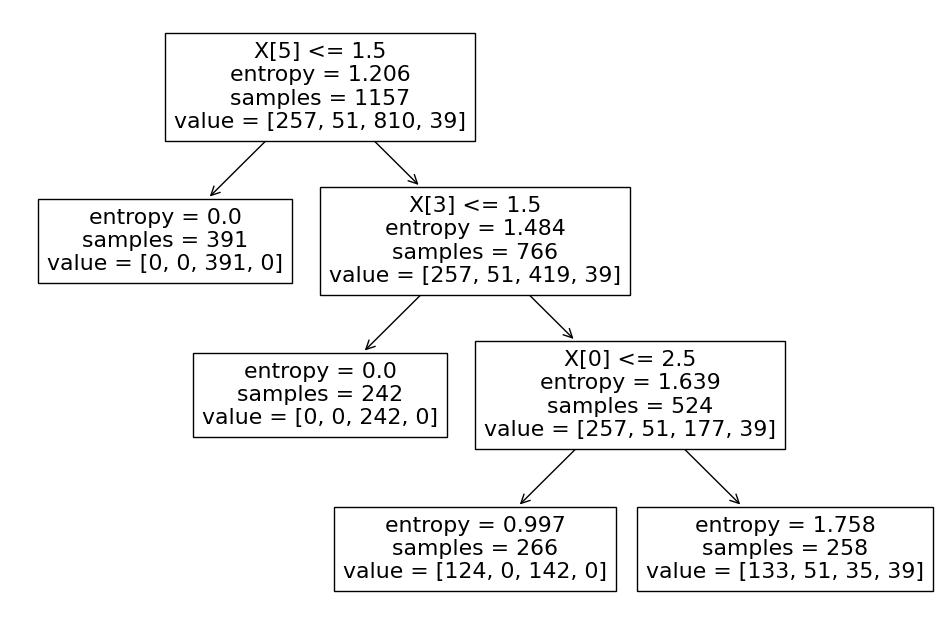

In [59]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(x_train, y_train)) 


In [60]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[ 58   0  69   0]
 [ 11   0   7   0]
 [ 43   0 356   0]
 [ 17   0   9   0]]


In [61]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

         acc       0.45      0.46      0.45       127
        good       0.00      0.00      0.00        18
       unacc       0.81      0.89      0.85       399
       vgood       0.00      0.00      0.00        26

    accuracy                           0.73       570
   macro avg       0.31      0.34      0.33       570
weighted avg       0.67      0.73      0.69       570



C:\Users\Nidhi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nidhi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nidhi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
